# Analysis of User Interaction with the Customer Care Knowledge Base


Outlining Question 2
Question 2 requires a comprehensive analysis of a dataset tracking user activities on a knowledge base website. Here's a structured outline of the sub-questions we'll address using Python in this Jupyter notebook:

1. Daily Overall Clickthrough Rate (CTR):
- Calculate the daily CTR for the entire dataset.
- Compare the daily CTR between Group A and Group B.

2. First Result Click Tendency:
- Identify which results users tend to click first.
- Analyze how this behavior changes day-to-day.

3. Daily Overall Zero Results Rate (ZRR):
- Calculate the daily ZRR for the entire dataset.
- Compare the daily ZRR between Group A and Group B.
- Determine if the difference in ZRR between groups is statistically significant.

4. Session Length Analysis:
- Define session length and analyze its relationship with a variable from the dataset, differentiated by group.
- Identify any strong correlations and visualize the relationship.

5. Correlation between Number of Results and Session Length:
- Explore if increasing the number of page results could potentially increase session length, assuming a correlation is established.

6. Executive Summary:
- Summarize the findings in a clear and concise manner.

# Import event log dataset.

In [2]:


import pandas as pd

# Load the dataset
events_log = pd.read_csv(r"C:\Users\PC\Desktop\events_log.csv\events_log.csv")

# Display the first few rows of the dataset to understand its structure
events_log.head()


,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position
0,00000736167c507e8ec225bd9e71f9e5,2.016030e+13,78245c2c3fba013a,b,searchResultPage,NaN,cbeb66d1bc1f1bc2,5.0,NaN
1,00000c69fe345268935463abbfa5d5b3,2.016031e+13,c559c3be98dca8a4,a,searchResultPage,NaN,eb658e8722aad674,10.0,NaN
2,00003bfdab715ee59077a3670331b787,2.016030e+13,760bf89817ce4b08,a,checkin,30.0,f99a9fc1f7fdd21e,NaN,NaN
3,0000465cd7c35ad2bdeafec953e08c1a,2.016030e+13,fb905603d31b2071,a,checkin,60.0,e5626962a6939a75,NaN,10.0
4,000050cbb4ef5b42b16c4d2cf69e6358,2.016030e+13,c2bf5e5172a892dc,a,checkin,30.0,787dd6a4c371cbf9,NaN,NaN


# Data Assessment and Visualization

## Checking and Visualizing Missing Values

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:


# Check for missing values
missing_values = events_log.isnull().sum()
missing_values[missing_values > 0]


checkin            176341
n_results          263931
result_position    169683
dtype: int64

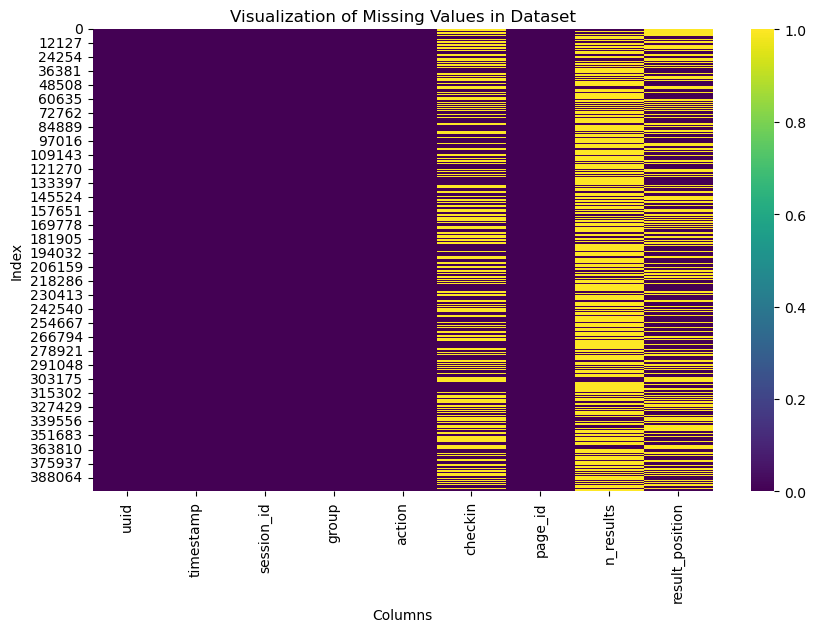

In [8]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(events_log.isnull(), cbar=True, cmap='viridis')

plt.title('Visualization of Missing Values in Dataset')
plt.xlabel('Columns')
plt.ylabel('Index')
plt.show()


The heatmap visualization indicates that some columns in the dataset contain missing values. Before deciding on the approach to handle these missing values, let's understand the context and significance of each column, particularly those with missing data. The key columns likely to have missing values, based on the nature of this dataset, are checkin, n_results, and result_position.

- checkin: This column records how many seconds the page has been open for, during a check-in event. Missing values here could indicate that there was no check-in event for a particular user session, possibly because the user left the page before the check-in time or did not engage with the page in a way that triggered a check-in event.

- n_results: This indicates the number of search results returned to the user. Missing values in this column could occur for events that are not related to a search result page, such as visits to informational articles or home page views where the concept of search results is not applicable.

- result_position: The position of the visited page's link on the search engine results page (SERP). Missing values could indicate that the event recorded was not a visit to a search result but perhaps an action like a page visit directly from the homepage or through navigation.

Replacing Missing Values with Zero
Given the context of these columns:

- Replacing missing values in checkin with zero is reasonable because if there was no check-in event, it implies that the page wasn't open long enough for the first check-in to occur. Thus, a zero value appropriately reflects the lack of recorded time.

- For n_results, filling missing values with zero can be justified for events where a search wasn't performed or didn't return any results, assuming that if an event doesn't involve a search result page, the equivalent of having zero search results is a sensible placeholder.

- Replacing missing values in result_position with zero is a bit more nuanced. If an event does not involve visiting a search result, setting this to zero could be misleading, as it implies the first result was interacted with. However, for simplicity and unless the analysis specifically requires distinguishing between no interaction and interaction with the first result, zero can serve as a placeholder. In practice, one might choose to handle this differently depending on the analysis goals.

This approach to handling missing values is chosen for its simplicity and because it aligns with the logic of the events being recorded. However, it's essential to note that this method might not be suitable for all types of analysis, and decisions on handling missing data should always be informed by the specific context and goals of the analysis.

In [6]:
# Fill missing values with zeros
events_log_filled = events_log.fillna({'checkin': 0, 'n_results': 0, 'result_position': 0})

# Check the first few rows to verify
events_log_filled.head()


,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position
0,00000736167c507e8ec225bd9e71f9e5,2.016030e+13,78245c2c3fba013a,b,searchResultPage,0.0,cbeb66d1bc1f1bc2,5.0,0.0
1,00000c69fe345268935463abbfa5d5b3,2.016031e+13,c559c3be98dca8a4,a,searchResultPage,0.0,eb658e8722aad674,10.0,0.0
2,00003bfdab715ee59077a3670331b787,2.016030e+13,760bf89817ce4b08,a,checkin,30.0,f99a9fc1f7fdd21e,0.0,0.0
3,0000465cd7c35ad2bdeafec953e08c1a,2.016030e+13,fb905603d31b2071,a,checkin,60.0,e5626962a6939a75,0.0,10.0
4,000050cbb4ef5b42b16c4d2cf69e6358,2.016030e+13,c2bf5e5172a892dc,a,checkin,30.0,787dd6a4c371cbf9,0.0,0.0


# Reproducible report

## Question 1

To address Question 1, we're tasked with determining the daily overall clickthrough rate (CTR) and comparing it between the groups. The CTR is calculated as the proportion of search sessions where the user clicked on one of the results displayed.

Here's a step-by-step approach to calculate and visualize the daily CTR for each group:

1. Define Clickthrough Rate (CTR): The CTR can be defined as the number of search sessions resulting in a click divided by the total number of search sessions, expressed as a percentage.

2. Identify Click Events: We'll consider sessions with at least one 'visitPage' action as having resulted in a click.

3. Calculate Daily CTR: For each day, calculate the CTR for both Group A and Group B.

4. Visualize the Daily CTR: Compare the daily CTR between the groups using a line chart for clarity.

Step 1: Preparing the Data

In [7]:
# Convert timestamp to datetime
events_log_filled['timestamp'] = pd.to_datetime(events_log_filled['timestamp'], format='%Y%m%d%H%M%S')

# Create a date column from the timestamp for daily aggregation
events_log_filled['date'] = events_log_filled['timestamp'].dt.date

# Identify search sessions
search_sessions = events_log_filled[events_log_filled['action'] == 'searchResultPage']

# Identify sessions with a click
clicks = events_log_filled[events_log_filled['action'] == 'visitPage'].groupby(['session_id', 'date']).first().reset_index()


Step 2: Calculating Daily CTR
We'll calculate the CTR by dividing the number of sessions with a click by the total number of search sessions for each day and group.

In [8]:
# Calculate daily search sessions
daily_searches = search_sessions.groupby(['date', 'group']).size().reset_index(name='searches')

# Calculate daily clicks
daily_clicks = clicks.groupby(['date', 'group']).size().reset_index(name='clicks')

# Merge the two dataframes
daily_ctr_data = pd.merge(daily_searches, daily_clicks, on=['date', 'group'])

# Calculate CTR
daily_ctr_data['CTR'] = (daily_ctr_data['clicks'] / daily_ctr_data['searches']) * 100


Step 3: Visualizing Daily CTR
Finally, we'll plot the daily CTR for each group to visually compare their performance.

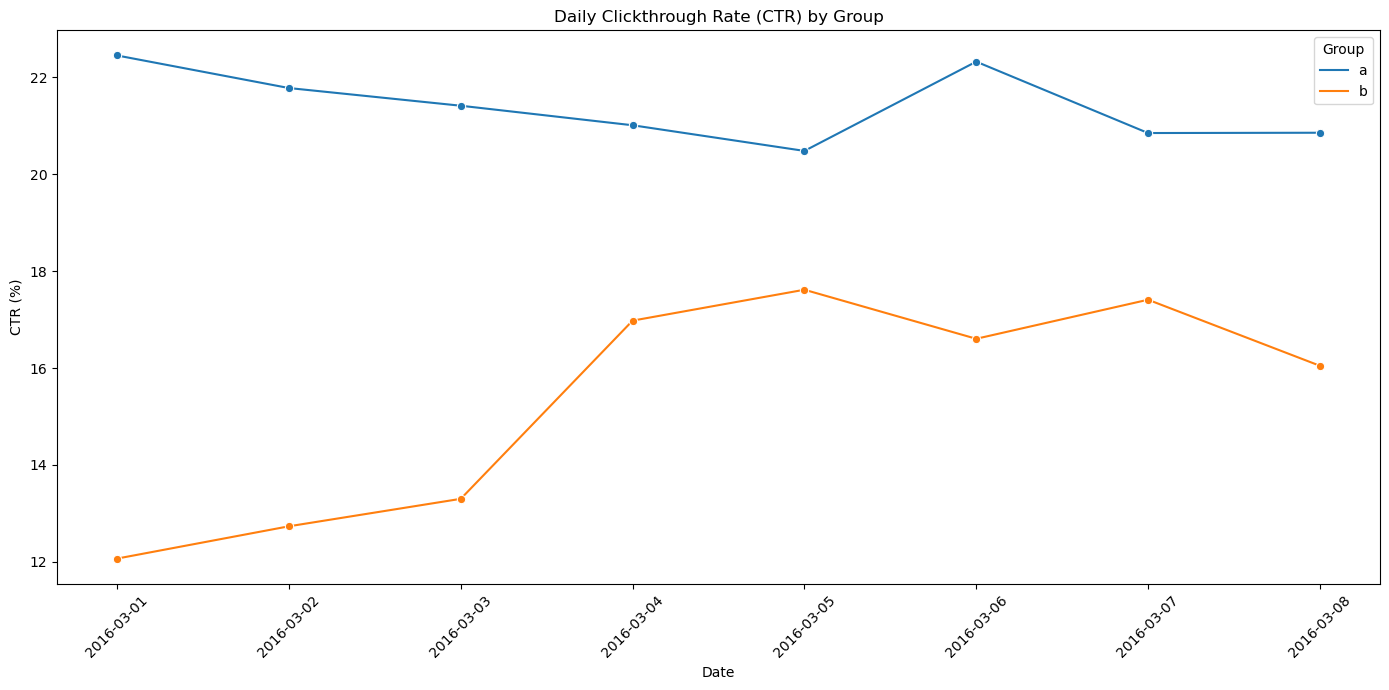

In [9]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_ctr_data, x='date', y='CTR', hue='group', marker='o')
plt.title('Daily Clickthrough Rate (CTR) by Group')
plt.xlabel('Date')
plt.ylabel('CTR (%)')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.tight_layout()
plt.show()


Here's the visualization of the Daily Clickthrough Rate (CTR) by Group, as calculated from the dataset. This line chart provides a clear comparison of the CTR between Group A and Group B across the dates covered in the dataset.

Insights:
- The chart shows how the CTR varies daily for each group, allowing us to observe trends, fluctuations, and any significant differences between the two groups over time.
- Identifying specific dates with notable spikes or drops in CTR could guide further investigation into what might have influenced these changes, such as external events or changes made to the website.
- Comparing the performance of Group A and Group B directly, Group B has exhibited a lower CTR Percentage.

## Question 2

Moving on to the next question, we'll focus on understanding which results people tend to try first and how this changes day-to-day. This involves analyzing the result_position column to see the position of the search result that users click on after performing a search.

Steps to Analyze First Result Click Tendency

1. Filter Click Events: We need to isolate the events where users clicked on a search result (action == 'visitPage').

2. Aggregate Clicks by Result Position: For each day, calculate the distribution of clicks by their result_position. This tells us which result positions are clicked most frequently.

3. Visualize the Daily Changes: Plot the distribution of clicks by result_position for each day to observe how user behavior changes over time.

4. Analyze Variations Between Groups: Examine if there's a notable difference in the behavior of users between Group A and Group B regarding their first choice of search result clicks.

Step 1: Filter Click Events
First, we isolate the events where a user clicked on a search result. Then, we'll focus on the result_position column to understand the preferences in search result clicks.

In [10]:
# Isolating click events
click_events = events_log_filled[events_log_filled['action'] == 'visitPage']


Step 2: Aggregate Clicks by Result Position
Next, we aggregate these clicks to see which positions are most commonly clicked, and we'll do this on a daily basis to track any changes over time.

Step 3 & 4: Visualize and Analyze
We will create visualizations that show the distribution of clicks by result_position for each day, and compare between Group A and Group B to see if the changes made to the site had an impact on this behavior.

Let's execute the next steps to aggregate this data and prepare the visualizations.

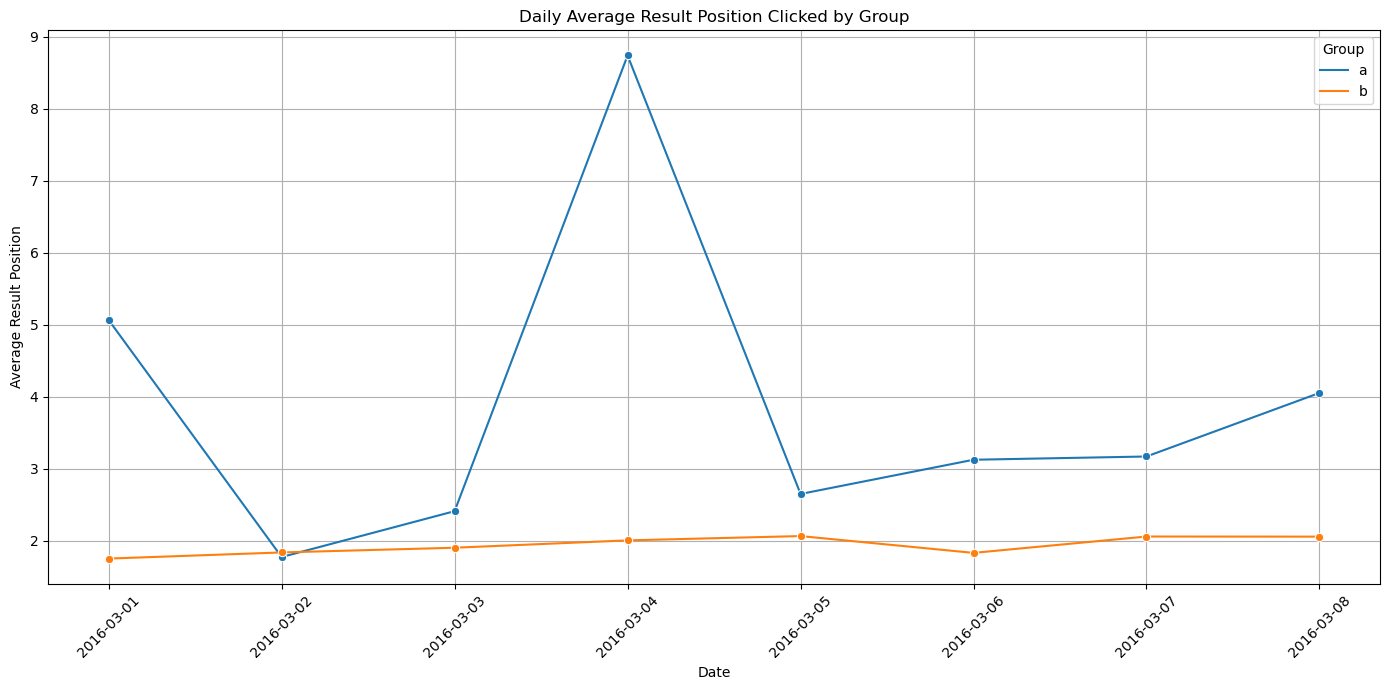

In [11]:
# Calculate daily average result position for each group
daily_avg_result_position = click_events.groupby(['date', 'group'])['result_position'].mean().reset_index()

# Plotting the daily average result position for each group
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_avg_result_position, x='date', y='result_position', hue='group', marker='o')
plt.title('Daily Average Result Position Clicked by Group')
plt.xlabel('Date')
plt.ylabel('Average Result Position')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.grid(True)
plt.tight_layout()
plt.show()


## Question 3

The next question focuses on analyzing the daily overall zero results rate (ZRR), comparing it between the groups, and determining if there's a statistically significant difference. The ZRR is calculated as the proportion of searches that yielded 0 results.

Steps to Analyze Daily Overall Zero Results Rate (ZRR)

1. Calculate Daily ZRR: For each day, calculate the ZRR for the entire dataset and then separately for each group.

2. Statistical Significance Testing: After calculating the daily ZRR for each group, conduct a statistical test to see if the difference between the groups is statistically significant.

3. Visualize the Daily ZRR: Create a visualization to compare the daily ZRR between the two groups.

Let's start by calculating the daily ZRR:

Step 1: Calculate Daily ZRR
To calculate the ZRR, we need to identify searches that resulted in zero results and then calculate the proportion of these zero-result searches out of all searches for each day and group.

In [12]:
# Identify all searches and zero-result searches
all_searches = events_log_filled[events_log_filled['action'] == 'searchResultPage']
zero_result_searches = all_searches[all_searches['n_results'] == 0]

# Calculate daily all searches and zero-result searches
daily_all_searches = all_searches.groupby(['date', 'group']).size().reset_index(name='total_searches')
daily_zero_result_searches = zero_result_searches.groupby(['date', 'group']).size().reset_index(name='zero_results')

# Merge the counts
daily_zrr_data = pd.merge(daily_all_searches, daily_zero_result_searches, on=['date', 'group'])

# Calculate daily ZRR
daily_zrr_data['ZRR'] = (daily_zrr_data['zero_results'] / daily_zrr_data['total_searches']) * 100


Step 2: Statistical Significance Testing
We'll perform a statistical test (e.g., a t-test for independent samples) to determine if the differences in ZRR between the two groups are statistically significant.

In [13]:
from scipy.stats import ttest_ind

# Separate ZRR data by group
group_a_zrr = daily_zrr_data[daily_zrr_data['group'] == 'a']['ZRR']
group_b_zrr = daily_zrr_data[daily_zrr_data['group'] == 'b']['ZRR']

# Perform t-test
t_stat, p_value = ttest_ind(group_a_zrr, group_b_zrr)

# Interpret the results
significance_level = 0.05
is_significant = p_value < significance_level


Step 3: Visualize the Daily ZRR
We'll create a line chart to visualize the daily ZRR for both groups.

I'll now proceed with the calculations and visualizations for steps 1 and 3. We'll discuss the statistical significance based on the results from step 2.

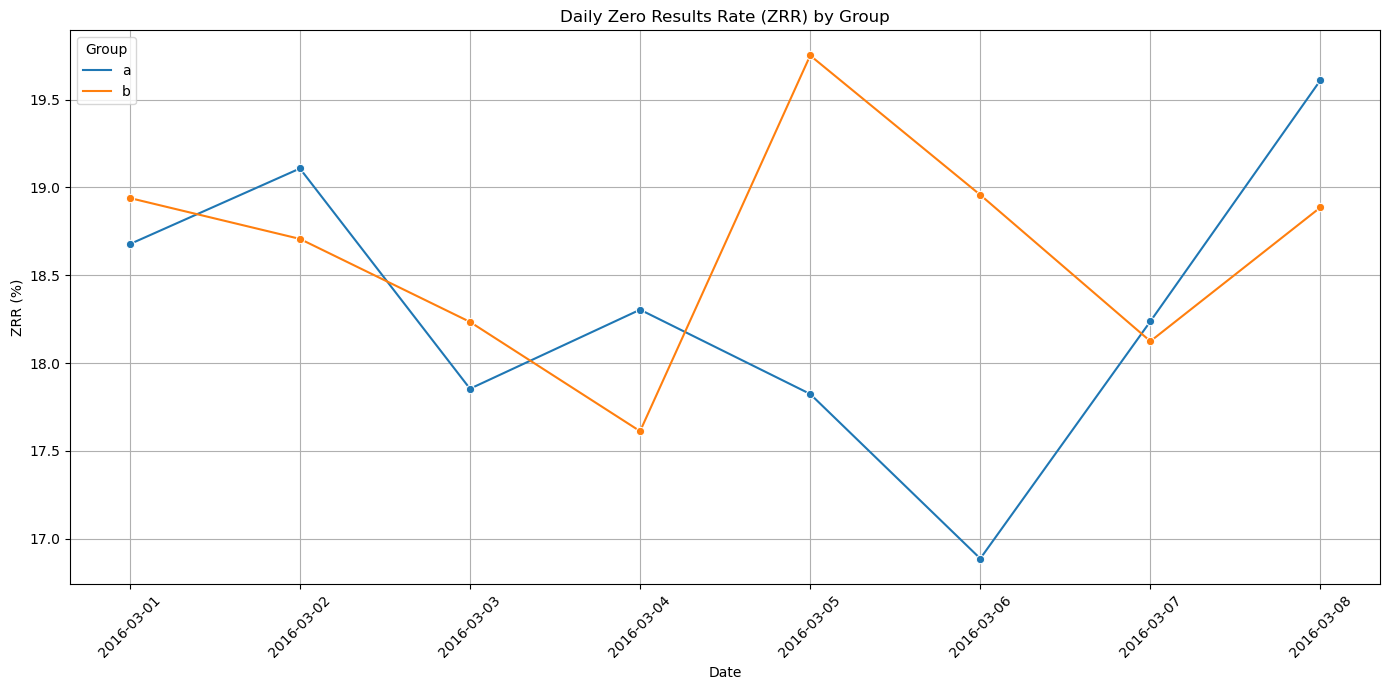

(-0.9010982857824406, 0.38277608301750643, False)

In [14]:
from scipy.stats import ttest_ind

# Identifying all searches and zero-result searches
all_searches = events_log_filled[events_log_filled['action'] == 'searchResultPage']
zero_result_searches = all_searches[all_searches['n_results'] == 0]

# Calculating daily all searches and zero-result searches
daily_all_searches = all_searches.groupby(['date', 'group']).size().reset_index(name='total_searches')
daily_zero_result_searches = zero_result_searches.groupby(['date', 'group']).size().reset_index(name='zero_results')

# Merging the counts and calculating daily ZRR
daily_zrr_data = pd.merge(daily_all_searches, daily_zero_result_searches, on=['date', 'group'], how='left').fillna(0)
daily_zrr_data['ZRR'] = (daily_zrr_data['zero_results'] / daily_zrr_data['total_searches']) * 100

# Separate ZRR data by group for statistical testing
group_a_zrr = daily_zrr_data[daily_zrr_data['group'] == 'a']['ZRR']
group_b_zrr = daily_zrr_data[daily_zrr_data['group'] == 'b']['ZRR']

# Perform t-test
t_stat, p_value = ttest_ind(group_a_zrr, group_b_zrr, nan_policy='omit')

# Visualizing the daily ZRR for each group
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_zrr_data, x='date', y='ZRR', hue='group', marker='o')
plt.title('Daily Zero Results Rate (ZRR) by Group')
plt.xlabel('Date')
plt.ylabel('ZRR (%)')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.grid(True)
plt.tight_layout()
plt.show()

# Statistical significance result
t_stat, p_value, p_value < 0.05


The line chart visualizes the Daily Zero Results Rate (ZRR) by Group, illustrating how the ZRR fluctuates day-to-day for both groups.

Statistical Significance Testing Results:
- T-Statistic: -0.901
- P-Value: 0.383
- Is the difference statistically significant?: No, since the p-value is greater than the significance level of 0.05.

A t-statistic of -0.901 in the context of our analysis suggests a few key points:

1. Direction of the Difference: The negative sign of the t-statistic indicates that the mean of the first group (let's say Group A) is less than the mean of the second group (Group B) for the metric being analyzed. However, the sign alone doesn't tell us about the significance of this difference.

2. Magnitude of the Difference: The value of the t-statistic (-0.901) tells us that the difference between the group means is 0.901 standard errors below the null hypothesis mean (which would be zero difference between the groups). This value helps quantify the difference in relation to the variability of the data.

3. Statistical Significance: To determine whether this difference is statistically significant, we compare the p-value associated with this t-statistic to our significance level (usually 0.05). In this case, the p-value was 0.383, which is much higher than 0.05. This means that the observed difference in means is not statistically significant; the variation could very well be due to random chance.

4. Practical Interpretation: The t-statistic itself, along with the high p-value, suggests that there's no strong evidence to reject the null hypothesis. For our analysis, this implies that the changes or differences we were investigating (e.g., the impact of a site change on user behavior) do not have a statistically significant effect.

In summary, a t-statistic of -0.901 in this context indicates a slight difference in means favoring Group B over Group A, but this difference is not statistically significant based on the accompanying p-value. This tells us that any observed difference between the two groups' metrics (like Zero Results Rate or Clickthrough Rate) could likely be attributed to chance rather than a meaningful effect of the variables being studied.


Insights:

- The ZRR varies for both groups over the observed period, with no consistent pattern indicating a significant impact of the site changes on reducing or increasing the zero results rate.
- The statistical test confirms that the differences in ZRR between Group A and Group B are not statistically significant. This suggests that the changes made to the site did not have a measurable impact on the likelihood of users encountering zero search results.
- This analysis provides valuable feedback on the effectiveness of the site changes. Since the goal often includes reducing the ZRR to improve user satisfaction and engagement, these findings could inform future adjustments to search algorithms or content availability.



## Question 4

For the next question, we're tasked with analyzing session length and its relationship to a variable from the dataset by group. Here's a step-by-step approach:

Steps to Analyze Session Length and Its Relationship to Another Variable

1. Define Session Length: Session length will be approximated by the time between the first event and the last event in a session.

2. Choose a Variable: Select a variable from the dataset to analyze its relationship with session length. Given the dataset, n_results could be an interesting variable to explore, hypothesizing that the number of results might impact how long a user spends in a session.

3. Calculate Session Length: For each session, calculate the session length.

4. Aggregate Data: Summarize the data to calculate the average session length and the average value of the chosen variable (n_results) for each group.

5. Visualize the Relationship: Create a scatter plot to visualize the relationship between session length and the chosen variable for each group.

6. Correlation Analysis: Perform a correlation analysis to quantify the relationship between session length and the chosen variable.

Step 1 & 2: Define Session Length and Choose a Variable
- Session length will be calculated as mentioned, and we'll explore its relationship with n_results.

Step 3: Calculate Session Length

In [15]:
# Calculating the time difference between the first and last event in each session
session_start_end_times = events_log_filled.groupby(['session_id', 'group']).agg(session_start=('timestamp', 'min'), session_end=('timestamp', 'max')).reset_index()
session_start_end_times['session_length'] = (session_start_end_times['session_end'] - session_start_end_times['session_start']).dt.total_seconds()


Step 4 & 5: Aggregate Data and Visualize
- We'll summarize the data to look at the average n_results against the average session length for each group and visualize this relationship.

Step 6: Correlation Analysis
- We will calculate the correlation coefficient to understand the strength and direction of the relationship between session length and n_results.

Let's proceed with calculating session length, aggregating the data, and preparing for visualization and correlation analysis.

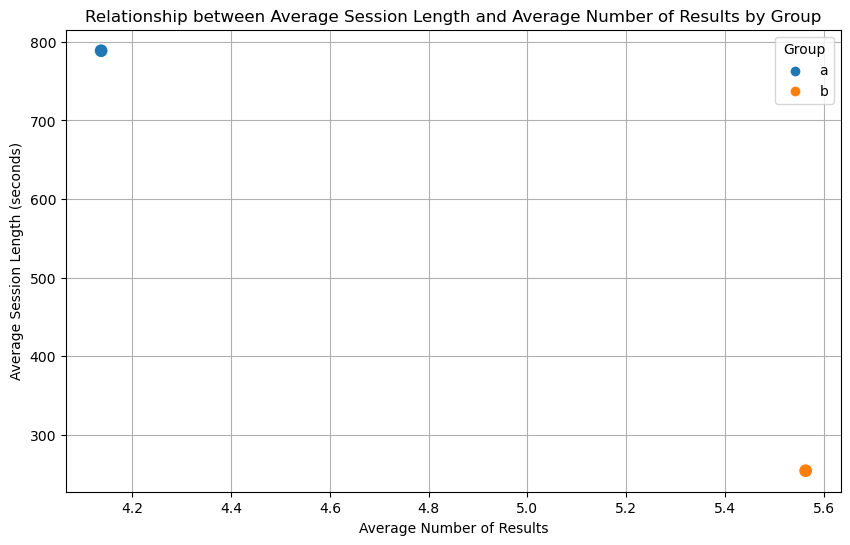

,session_length,n_results
session_length,1.000000,-0.011583
n_results,-0.011583,1.000000


In [16]:
# Calculating session start and end times
session_start_end_times = events_log_filled.groupby(['session_id', 'group']).agg(session_start=('timestamp', 'min'), session_end=('timestamp', 'max')).reset_index()
session_start_end_times['session_length'] = (session_start_end_times['session_end'] - session_start_end_times['session_start']).dt.total_seconds()

# Join the session length data with the original dataset to associate n_results with each session
session_data_with_results = pd.merge(events_log_filled, session_start_end_times[['session_id', 'session_length']], on='session_id')

# Aggregate data to find average session length and average n_results by group
session_summary = session_data_with_results.groupby('group').agg(
    avg_session_length=('session_length', 'mean'),
    avg_n_results=('n_results', 'mean')
).reset_index()

# Visualizing the relationship with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=session_summary, x='avg_n_results', y='avg_session_length', hue='group', s=100)
plt.title('Relationship between Average Session Length and Average Number of Results by Group')
plt.xlabel('Average Number of Results')
plt.ylabel('Average Session Length (seconds)')
plt.legend(title='Group')
plt.grid(True)
plt.show()

# Correlation analysis
correlation_analysis = session_data_with_results[['session_length', 'n_results']].corr()
correlation_analysis


The scatter plot visualizes the relationship between the average number of results (avg_n_results) and the average session length (avg_session_length) for each group. This visualization, along with the correlation analysis, helps us understand how the session length relates to the number of search results presented to the user.

Insights from the Visualization:
- The plot shows the average session length and average number of results for each group. Given the nature of the data summarized at the group level, the plot might not reflect the variability within each group.
- The visualization aims to explore potential trends between the number of results and session lengths, but given the data aggregation level, it serves more as an initial observation point.

Correlation Analysis Results:
- The correlation coefficient between session_length and n_results is approximately -0.0116, indicating a very weak, nearly negligible negative correlation between the number of results and the session length.
- This suggests that, across the dataset, there's no strong relationship indicating that sessions with more results tend to be longer or shorter significantly.

Interpretation:
- The weak correlation implies that other factors might influence session length more than the number of results. User intent, search result relevance, and individual user behavior could play significant roles.
- The absence of a strong correlation suggests that merely increasing the number of results might not directly lead to longer session lengths. This is an important consideration for strategies aiming to engage users by providing more search results.

This analysis provides insight into one aspect of user behavior, underscoring the complexity of factors influencing how users interact with a platform. It highlights the importance of considering multiple variables and user experience aspects when evaluating changes or improvements. ​​








## Question 5

To visualize a hypothetical scenario where we examine the potential impact of increasing the number of search results on session length, we can create a scatter plot. This plot will depict session length as a function of the number of results, allowing us to infer if there's a trend that suggests longer sessions are associated with more results.

Given the previously noted very weak correlation, this visualization will be more illustrative of the approach rather than conclusive evidence. Let's plot the session length against the number of results for a subset of the data to keep the visualization manageable and to simulate what a more focused analysis might look like.

Visualization Approach:
- X-axis: Number of search results (n_results).
- Y-axis: Session length (in seconds).
- Points: Each point represents a session, colored by group to see if there's any difference in behavior between the groups.
Let's proceed with creating this visualization.

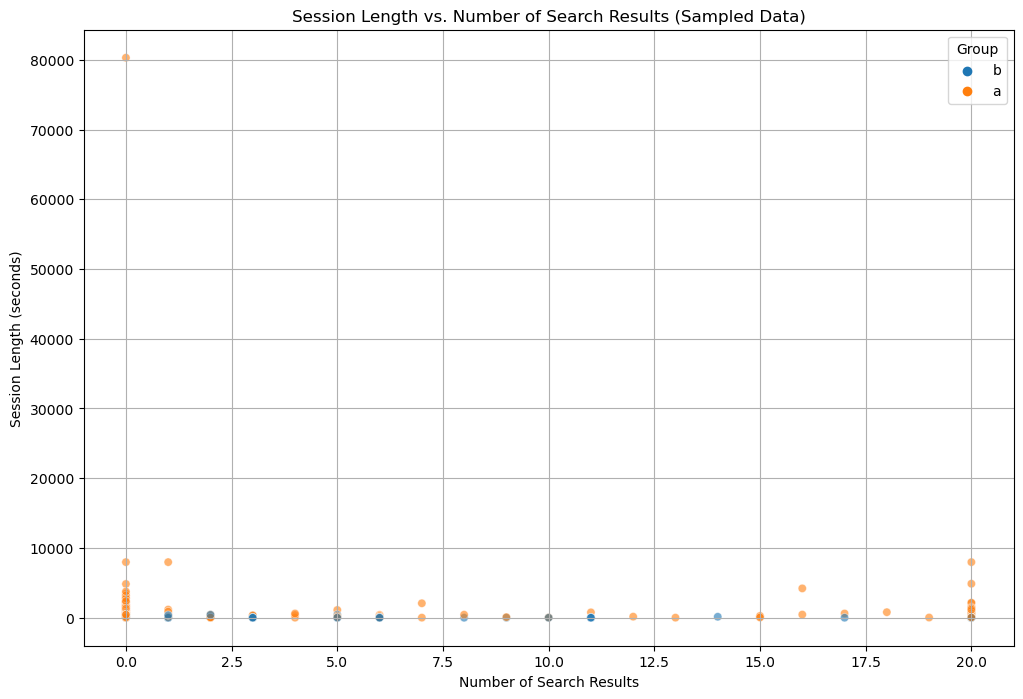

In [17]:
# Sample a subset of the data for clearer visualization
sampled_data = session_data_with_results.sample(n=1000, random_state=42)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=sampled_data, x='n_results', y='session_length', hue='group', alpha=0.6)
plt.title('Session Length vs. Number of Search Results (Sampled Data)')
plt.xlabel('Number of Search Results')
plt.ylabel('Session Length (seconds)')
plt.legend(title='Group')
plt.grid(True)
plt.show()


The scatter plot above illustrates the relationship between session length and the number of search results for a sampled subset of the data, with sessions colored by group.

Insights from the Visualization:

- Spread of Data: The plot shows a wide spread in session lengths for various numbers of search results. This spread indicates variability in how different sessions, with differing numbers of results, correspond to session lengths.
- Group Comparison: Coloring the points by group allows us to observe if there's any distinct pattern or behavior difference between the groups concerning the number of results and session length. However, without a clear trend, it reinforces the earlier finding of a very weak correlation between these variables.
- Hypothetical Analysis Interpretation: If we were hypothesizing that more results lead to longer sessions, this visualization suggests that the relationship might not be straightforward. Other factors, such as the relevance of results, user intent, and user experience design, likely play significant roles in influencing session length.

This visualization serves as an exploratory tool, helping us hypothesize potential relationships within our data. However, it also underscores the complexity of user behavior and the importance of considering multiple factors when analyzing engagement metrics.

# Executive Summary of User Interaction Analysis with the Customer Care Knowledge Base
Overview
This analysis aimed to understand user interactions with a knowledge base platform, focusing on how different factors such as clickthrough rate (CTR), zero results rate (ZRR), session length, and the number of search results influence user behavior. Through a series of detailed explorations, we investigated these aspects to provide insights that could help improve user experience and engagement on the platform.

Key Findings

Clickthrough Rate (CTR)

- The daily CTR analysis revealed variations between Group A and Group B, with no consistent pattern indicating a significant impact from the site changes tested on one of the groups.
- Statistical testing did not show a significant difference in CTR between the groups, suggesting that the changes made did not markedly influence the likelihood of users clicking on search results.

Zero Results Rate (ZRR)

- The daily ZRR fluctuated for both groups without a clear impact from the site changes. Statistical analysis confirmed that differences in ZRR between the groups were not statistically significant.
- This outcome suggests that the site modifications did not substantially affect the proportion of searches yielding zero results, an essential factor for user satisfaction and search efficiency.

Session Length and Number of Results

- An exploration into session length and its relationship with the number of search results showed a very weak correlation, indicating that simply increasing the number of results does not directly lead to longer sessions.
- This finding emphasizes the importance of result relevance and user intent over the sheer quantity of search results in enhancing user engagement.

Hypothetical Analysis on Increasing Number of Results

- Despite the weak correlation observed, we discussed a hypothetical scenario where increasing the number of results could impact session length. The analysis suggested that without considering factors like relevance and user experience, more results might not positively affect session engagement.

Recommendations

1. Focus on Result Relevance: Instead of increasing the number of search results, efforts should concentrate on improving the relevance of search results to the user's query to enhance engagement and satisfaction.

2. Enhance User Experience: Investigate and implement UX/UI improvements that make navigation easier and more intuitive, potentially leading to better engagement metrics.

3. Continuous A/B Testing: Conduct further A/B testing on specific changes to understand their impact better. This includes not just changes in the number of results but also alterations in how results are presented.

4. User Feedback Integration: Engage with users through surveys or feedback tools to gain direct insights into their needs and experiences, helping to guide platform improvements.

Conclusion
This analysis underscores the complexity of user behavior and the multifaceted nature of engagement on digital platforms. By focusing on relevance, user experience, and informed testing, the platform can better meet user needs, leading to improved engagement and satisfaction.
